In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas_gbq
#pip install pygraphviz
#import pygraphviz

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

In [3]:
Deals = 'TBiz BB Capped Advanced'

In [5]:
query = """
SELECT *
FROM `bcx-insights.telkom_customerexperience.orders_20190926_00_anon`
WHERE DEAL_DESC = '{}'
ORDER BY ORDER_CREATION_DATE, ACTION_CREATION_DATE, ORDER_ID_ANON
""".format(Deals)

In [6]:
query

"\nSELECT *\nFROM `bcx-insights.telkom_customerexperience.orders_20190926_00_anon`\nWHERE DEAL_DESC = 'TBiz BB Capped Advanced'\nORDER BY ORDER_CREATION_DATE, ACTION_CREATION_DATE, ORDER_ID_ANON\n"

In [7]:
orders_df = pd.read_gbq(query,
                project_id = 'bcx-insights',
                dialect = 'standard')

In [8]:
orders_df.tail(3)

ORDER_STATUS_DESC       ORDER_CREATION_DATE ACTION_STATUS_DESC  \
7843              Done 2019-09-18 06:41:04+00:00               Done   
7844              Done 2019-09-18 06:41:06+00:00               Done   
7845              Done 2019-09-18 06:41:14+00:00               Done   

     ACTION_TYPE ACTION_TYPE_DESC      ACTION_CREATION_DATE  \
7843          HS     Hard Suspend 2019-09-18 06:41:04+00:00   
7844          HS     Hard Suspend 2019-09-18 06:41:05+00:00   
7845          HS     Hard Suspend 2019-09-18 06:41:13+00:00   

     ORIGINAL_SALES_CHANNEL_DESC CURRENT_SALES_CHANNEL_DESC  \
7843                 Call Center                Call Center   
7844                 Call Center                Call Center   
7845                 Call Center                Call Center   

                    DEAL_DESC                 PROV_DATE  \
7843  TBiz BB Capped Advanced 2019-09-18 23:59:59+00:00   
7844  TBiz BB Capped Advanced 2019-09-18 23:59:59+00:00   
7845  TBiz BB Capped Advanced 2019-09-18 23:59:59+00:00   

                    CLOSE_DATE OPEN_CLOSE_INDIC SOURCE        ORDER_ID_ANON  \
7843 2019-09-18 06:41:33+00:00                C      F -3623129877457504494   
7844 2019-09-18 06:41:26+00:00                C      F -4085417724732539719   
7845 2019-09-18 06:41:23+00:00                C      F -8459172821802969048   

          ACCOUNT_NO_ANON          MSISDN_ANON  ORDER_ACTION_ID_ANON  
7843  9179685449604117757 -3746220542732778290  -3107359610750660354  
7844  9179685449604117757   486548533846911321   5149598645928986403  
7845  9179685449604117757 -3379634856020541348   7366941129127761236

In [9]:
len(orders_df)

7846

In [10]:
orders_df = orders_df.drop_duplicates()

In [11]:
len(orders_df)

6816

In [12]:
orders_df['MSISDN_ANON'] = orders_df['MSISDN_ANON'].astype(str)

In [13]:
orders_df['ORDER_ID_ANON'] = orders_df['ORDER_ID_ANON'].astype(str)

In [14]:
unique_col = 'combo'

In [15]:
orders_df[unique_col] = orders_df['MSISDN_ANON']+'_'+orders_df['ORDER_ID_ANON']

In [16]:
orders_df['stage'] = orders_df.groupby(unique_col).cumcount()+1

In [17]:
final_stage = orders_df[[unique_col,'stage', 'ORDER_CREATION_DATE']].groupby(unique_col).agg({'stage': 'max', 'ORDER_CREATION_DATE': ['min', 'max']})

In [18]:
final_stage.head()

stage       ORDER_CREATION_DATE  \
                                            max                       min   
combo                                                                       
-1002689210467033689_-4097911263059863394     2 2019-06-10 13:55:28+00:00   
-1002689210467033689_-4708518482210045078     1 2019-06-10 13:44:49+00:00   
-1002689210467033689_-6805338612372424491     1 2019-08-29 06:26:56+00:00   
-1002689210467033689_4694949585886651643      1 2019-07-16 02:47:00+00:00   
-1002689210467033689_6330235094427327840      1 2019-08-29 10:21:36+00:00   

                                                                     
                                                                max  
combo                                                                
-1002689210467033689_-4097911263059863394 2019-07-02 10:07:27+00:00  
-1002689210467033689_-4708518482210045078 2019-06-10 13:44:49+00:00  
-1002689210467033689_-6805338612372424491 2019-08-29 06:26:56+00:00  
-1002689210467033689_4694949585886651643  2019-07-16 02:47:00+00:00  
-1002689210467033689_6330235094427327840  2019-08-29 10:21:36+00:00

In [19]:
final_stage.columns = ["_".join(pair) for pair in final_stage.columns]

In [20]:
#final_stage.columns = final_stage.columns.droplevel()

In [21]:
final_stage.rename(columns={'stage_max':'final_stage', 'ORDER_CREATION_DATE_min':'first_date', 'ORDER_CREATION_DATE_max':'last_date'}, inplace=True)

In [22]:
final_stage.head()

final_stage  \
combo                                                    
-1002689210467033689_-4097911263059863394            2   
-1002689210467033689_-4708518482210045078            1   
-1002689210467033689_-6805338612372424491            1   
-1002689210467033689_4694949585886651643             1   
-1002689210467033689_6330235094427327840             1   

                                                         first_date  \
combo                                                                 
-1002689210467033689_-4097911263059863394 2019-06-10 13:55:28+00:00   
-1002689210467033689_-4708518482210045078 2019-06-10 13:44:49+00:00   
-1002689210467033689_-6805338612372424491 2019-08-29 06:26:56+00:00   
-1002689210467033689_4694949585886651643  2019-07-16 02:47:00+00:00   
-1002689210467033689_6330235094427327840  2019-08-29 10:21:36+00:00   

                                                          last_date  
combo                                                                
-1002689210467033689_-4097911263059863394 2019-07-02 10:07:27+00:00  
-1002689210467033689_-4708518482210045078 2019-06-10 13:44:49+00:00  
-1002689210467033689_-6805338612372424491 2019-08-29 06:26:56+00:00  
-1002689210467033689_4694949585886651643  2019-07-16 02:47:00+00:00  
-1002689210467033689_6330235094427327840  2019-08-29 10:21:36+00:00

In [23]:
orders_df = pd.merge(orders_df, final_stage, on=unique_col, how='outer')

In [24]:
orders_df.head()

ORDER_STATUS_DESC       ORDER_CREATION_DATE ACTION_STATUS_DESC ACTION_TYPE  \
0              Done 2018-09-19 00:01:40+00:00               Done          CR   
1              Done 2018-09-19 00:08:19+00:00               Done          CR   
2              Done 2018-09-19 00:08:22+00:00               Done          CR   
3              Done 2018-09-19 00:11:18+00:00               Done          CR   
4              Done 2018-09-19 00:11:26+00:00               Done          CR   

                           ACTION_TYPE_DESC      ACTION_CREATION_DATE  \
0  Resume from Suspension due to Collection 2018-09-19 00:00:34+00:00   
1  Resume from Suspension due to Collection 2018-09-19 00:02:30+00:00   
2  Resume from Suspension due to Collection 2018-09-19 00:08:04+00:00   
3  Resume from Suspension due to Collection 2018-09-19 00:11:16+00:00   
4  Resume from Suspension due to Collection 2018-09-19 00:11:25+00:00   

  ORIGINAL_SALES_CHANNEL_DESC CURRENT_SALES_CHANNEL_DESC  \
0                 Call Center                Call Center   
1                 Call Center                Call Center   
2                 Call Center                Call Center   
3                 Call Center                Call Center   
4                 Call Center                Call Center   

                 DEAL_DESC                 PROV_DATE  ... SOURCE  \
0  TBiz BB Capped Advanced 2018-09-19 23:59:59+00:00  ...      F   
1  TBiz BB Capped Advanced 2018-09-19 23:59:59+00:00  ...      F   
2  TBiz BB Capped Advanced 2018-09-19 23:59:59+00:00  ...      F   
3  TBiz BB Capped Advanced 2018-09-19 23:59:59+00:00  ...      F   
4  TBiz BB Capped Advanced 2018-09-19 23:59:59+00:00  ...      F   

          ORDER_ID_ANON      ACCOUNT_NO_ANON           MSISDN_ANON  \
0   8014743664010143874  4880988462641041588   8267334465643049670   
1   4896610020755115874  4880988462641041588   5883010122451860359   
2  -7402119597778060068 -7190704940419402037   6881390640784013810   
3   -891254573908734095 -1202927280942112478  -7917274003366893655   
4  -4980229336441433325 -1202927280942112478  -3858268071889160291   

   ORDER_ACTION_ID_ANON                                      combo  stage  \
0    -22945164240823800    8267334465643049670_8014743664010143874      1   
1   6206333873489587611    5883010122451860359_4896610020755115874      1   
2   1589287855847731834   6881390640784013810_-7402119597778060068      1   
3   7874500299927321830   -7917274003366893655_-891254573908734095      1   
4  -6140598406575839500  -3858268071889160291_-4980229336441433325      1   

  final_stage                first_date                 last_date  
0           1 2018-09-19 00:01:40+00:00 2018-09-19 00:01:40+00:00  
1           1 2018-09-19 00:08:19+00:00 2018-09-19 00:08:19+00:00  
2           1 2018-09-19 00:08:22+00:00 2018-09-19 00:08:22+00:00  
3           1 2018-09-19 00:11:18+00:00 2018-09-19 00:11:18+00:00  
4           1 2018-09-19 00:11:26+00:00 2018-09-19 00:11:26+00:00  

[5 rows x 22 columns]

In [25]:
orders_df['total_time'] = orders_df['ORDER_CREATION_DATE']-orders_df['first_date']

In [26]:
orders_df[orders_df['final_stage']==2].head()

ORDER_STATUS_DESC       ORDER_CREATION_DATE ACTION_STATUS_DESC  \
52          Cancelled 2018-09-19 10:20:39+00:00          Cancelled   
53               Done 2018-09-19 10:41:39+00:00               Done   
147         Cancelled 2018-09-21 15:00:41+00:00          Cancelled   
148              Done 2018-09-25 12:46:42+00:00               Done   
274         Cancelled 2018-09-26 13:38:57+00:00          Cancelled   

    ACTION_TYPE       ACTION_TYPE_DESC      ACTION_CREATION_DATE  \
52           CI  Cease Part Of Migrate 2018-09-19 00:00:00+00:00   
53           CI  Cease Part Of Migrate 2018-09-19 00:00:00+00:00   
147          CI  Cease Part Of Migrate 2018-09-21 00:00:00+00:00   
148          CI  Cease Part Of Migrate 2018-09-21 00:00:00+00:00   
274          CH                 Change 2018-09-26 00:00:00+00:00   

    ORIGINAL_SALES_CHANNEL_DESC CURRENT_SALES_CHANNEL_DESC  \
52                  Call Center                Call Center   
53                  Call Center                Call Center   
147           WNS SMBS Outbound          WNS SMBS Outbound   
148           WNS SMBS Outbound          WNS SMBS Outbound   
274          Telkom Direct Shop         Telkom Direct Shop   

                   DEAL_DESC                 PROV_DATE  ...  \
52   TBiz BB Capped Advanced 1950-01-01 00:00:00+00:00  ...   
53   TBiz BB Capped Advanced 2018-09-19 12:41:55+00:00  ...   
147  TBiz BB Capped Advanced 1950-01-01 00:00:00+00:00  ...   
148  TBiz BB Capped Advanced 2018-09-25 13:18:32+00:00  ...   
274  TBiz BB Capped Advanced 1950-01-01 00:00:00+00:00  ...   

           ORDER_ID_ANON      ACCOUNT_NO_ANON           MSISDN_ANON  \
52   -798146561363310271  6512472196967755422   -163301983679457663   
53   -798146561363310271  6512472196967755422   -163301983679457663   
147  1927791018406881593  8730648574707157456  -5476603457303044367   
148  1927791018406881593  8730648574707157456  -5476603457303044367   
274  1311839235413350640 -5526670356510072085  -1737832741425107573   

    ORDER_ACTION_ID_ANON                                     combo stage  \
52   8269386966561002079   -163301983679457663_-798146561363310271     1   
53  -8038438834520941868   -163301983679457663_-798146561363310271     2   
147 -6211388984143561759  -5476603457303044367_1927791018406881593     1   
148 -7765968125154275429  -5476603457303044367_1927791018406881593     2   
274  1353844975755891999  -1737832741425107573_1311839235413350640     1   

     final_stage                first_date                 last_date  \
52             2 2018-09-19 10:20:39+00:00 2018-09-19 10:41:39+00:00   
53             2 2018-09-19 10:20:39+00:00 2018-09-19 10:41:39+00:00   
147            2 2018-09-21 15:00:41+00:00 2018-09-25 12:46:42+00:00   
148            2 2018-09-21 15:00:41+00:00 2018-09-25 12:46:42+00:00   
274            2 2018-09-26 13:38:57+00:00 2018-10-02 13:58:35+00:00   

         total_time  
52  0 days 00:00:00  
53  0 days 00:21:00  
147 0 days 00:00:00  
148 3 days 21:46:01  
274 0 days 00:00:00  

[5 rows x 23 columns]

In [27]:
orders_df['stage'] = orders_df['stage'].astype(str)

In [28]:
orders_df['ActionType_OrderStatus'] = orders_df['ACTION_TYPE_DESC'] +' * '+ orders_df['ORDER_STATUS_DESC'] 

In [29]:
type_status = list(orders_df['ActionType_OrderStatus'].unique())

In [30]:
orders_df['stage_ActionType_OrderStatus'] = orders_df['stage'] +') * '+ orders_df['ACTION_TYPE_DESC'] +' * '+ orders_df['ORDER_STATUS_DESC'] 

In [31]:
orders_df.tail(3)

ORDER_STATUS_DESC       ORDER_CREATION_DATE ACTION_STATUS_DESC  \
6813              Done 2019-09-18 06:41:04+00:00               Done   
6814              Done 2019-09-18 06:41:06+00:00               Done   
6815              Done 2019-09-18 06:41:14+00:00               Done   

     ACTION_TYPE ACTION_TYPE_DESC      ACTION_CREATION_DATE  \
6813          HS     Hard Suspend 2019-09-18 06:41:04+00:00   
6814          HS     Hard Suspend 2019-09-18 06:41:05+00:00   
6815          HS     Hard Suspend 2019-09-18 06:41:13+00:00   

     ORIGINAL_SALES_CHANNEL_DESC CURRENT_SALES_CHANNEL_DESC  \
6813                 Call Center                Call Center   
6814                 Call Center                Call Center   
6815                 Call Center                Call Center   

                    DEAL_DESC                 PROV_DATE  ...  \
6813  TBiz BB Capped Advanced 2019-09-18 23:59:59+00:00  ...   
6814  TBiz BB Capped Advanced 2019-09-18 23:59:59+00:00  ...   
6815  TBiz BB Capped Advanced 2019-09-18 23:59:59+00:00  ...   

               MSISDN_ANON ORDER_ACTION_ID_ANON  \
6813  -3746220542732778290 -3107359610750660354   
6814    486548533846911321  5149598645928986403   
6815  -3379634856020541348  7366941129127761236   

                                          combo stage  final_stage  \
6813  -3746220542732778290_-3623129877457504494     1            1   
6814    486548533846911321_-4085417724732539719     1            1   
6815  -3379634856020541348_-8459172821802969048     1            1   

                    first_date                 last_date total_time  \
6813 2019-09-18 06:41:04+00:00 2019-09-18 06:41:04+00:00     0 days   
6814 2019-09-18 06:41:06+00:00 2019-09-18 06:41:06+00:00     0 days   
6815 2019-09-18 06:41:14+00:00 2019-09-18 06:41:14+00:00     0 days   

     ActionType_OrderStatus  stage_ActionType_OrderStatus  
6813    Hard Suspend * Done      1) * Hard Suspend * Done  
6814    Hard Suspend * Done      1) * Hard Suspend * Done  
6815    Hard Suspend * Done      1) * Hard Suspend * Done  

[3 rows x 25 columns]

In [32]:
#orders_df.groupby(unique_col)

In [33]:
customers = list(orders_df[unique_col].unique())

In [34]:
sorted_df = orders_df.sort_values('stage', ascending=False)
sorted_df.head(3)

ORDER_STATUS_DESC       ORDER_CREATION_DATE ACTION_STATUS_DESC  \
336              Done 2018-11-20 10:10:17+00:00               Done   
410              Done 2018-10-09 14:54:01+00:00               Done   
588              Done 2018-10-10 13:54:29+00:00               Done   

    ACTION_TYPE             ACTION_TYPE_DESC      ACTION_CREATION_DATE  \
336          MS   Move Outdoor Same Exchange 2018-08-27 00:00:00+00:00   
410          MV  Move Outdoor Other Exchange 2018-10-02 00:00:00+00:00   
588          PR                      Provide 2018-10-10 00:00:00+00:00   

    ORIGINAL_SALES_CHANNEL_DESC  CURRENT_SALES_CHANNEL_DESC  \
336                 Call Center                 Call Center   
410              Consumer Sales              Consumer Sales   
588  Deregulated PABX Suppliers  Deregulated PABX Suppliers   

                   DEAL_DESC                 PROV_DATE  ...  \
336  TBiz BB Capped Advanced 2018-11-20 10:11:40+00:00  ...   
410  TBiz BB Capped Advanced 2018-10-09 14:56:37+00:00  ...   
588  TBiz BB Capped Advanced 2018-10-10 13:55:45+00:00  ...   

              MSISDN_ANON ORDER_ACTION_ID_ANON  \
336  -5358406379613644979 -8130465519461665528   
410   3842282672409691663 -4311406567201441950   
588   5100925659296341771  7122014269109539755   

                                        combo stage  final_stage  \
336  -5358406379613644979_4892878901532782903     4            4   
410   3842282672409691663_4834273730448523809     4            4   
588   5100925659296341771_-152669041816858573     4            4   

                   first_date                 last_date       total_time  \
336 2018-09-28 10:44:38+00:00 2018-11-20 10:10:17+00:00 52 days 23:25:39   
410 2018-10-02 14:54:19+00:00 2018-10-09 14:54:01+00:00  6 days 23:59:42   
588 2018-10-10 13:43:57+00:00 2018-10-10 13:54:29+00:00  0 days 00:10:32   

                 ActionType_OrderStatus  \
336   Move Outdoor Same Exchange * Done   
410  Move Outdoor Other Exchange * Done   
588                      Provide * Done   

                stage_ActionType_OrderStatus  
336   4) * Move Outdoor Same Exchange * Done  
410  4) * Move Outdoor Other Exchange * Done  
588                      4) * Provide * Done  

[3 rows x 25 columns]

In [35]:
len(orders_df[orders_df['stage']=='2'])

157

In [36]:
len(customers)

6650

In [37]:
# Create a networkx graph object
J = nx.Graph()

In [38]:
J.clear()

In [39]:
max_stage=max(orders_df['stage'].astype(int))
max_stage

4

In [40]:
actions = list(orders_df['stage_ActionType_OrderStatus'].unique())

In [41]:
J.add_node(Deals[:3],posi=(0.4,10), color = 'purple', acc_time = 0, node_count = 1)

In [42]:
for i in range(1,max_stage+1):
  
  stage_actions = list(orders_df[orders_df['stage']==str(i)]['stage_ActionType_OrderStatus'].unique())
  #print(stage_actions)
  for k in range(len(stage_actions)):
    label = stage_actions[k]
    #print(label)
    #print(len(orders_df[orders_df['stage_ActionType_OrderStatus']==label]))
    label = label.split('* ',1)
    label = label[1]
    #print(label)
    height =  type_status.index(label) +1
    #print(height)
    #print(height)
    J.add_node(stage_actions[k],posi=(i*1.25,height), acc_time = 0, node_count = len(orders_df[orders_df['stage_ActionType_OrderStatus']==stage_actions[k]]))
    #print(stage_actions[k])
    #print((i,k+1))

In [43]:
J.nodes(data = True)

NodeDataView({'1) * Cease Part Of Migrate * Done': {'acc_time': 0, 'node_count': 526, 'posi': (1.25, 9)}, '2) * Move Outdoor Same Exchange * Cancelled': {'acc_time': 0, 'node_count': 2, 'posi': (2.5, 14)}, '1) * Provide Part Of Migrate * Cancelled': {'acc_time': 0, 'node_count': 14, 'posi': (1.25, 30)}, '4) * Move Outdoor Same Exchange * Done': {'acc_time': 0, 'node_count': 1, 'posi': (5.0, 17)}, '1) * Change - Dispatchable * Done': {'acc_time': 0, 'node_count': 2, 'posi': (1.25, 26)}, '1) * Cease * Delivery': {'acc_time': 0, 'node_count': 4, 'posi': (1.25, 41)}, '1) * Soft Suspend * Done': {'acc_time': 0, 'node_count': 2000, 'posi': (1.25, 3)}, '1) * Change - No Dispatch * Done': {'acc_time': 0, 'node_count': 143, 'posi': (1.25, 7)}, '1) * Change - No Dispatch * Cancelled': {'acc_time': 0, 'node_count': 15, 'posi': (1.25, 18)}, '1) * Change SN * Done': {'acc_time': 0, 'node_count': 4, 'posi': (1.25, 35)}, '1) * Provide * Done': {'acc_time': 0, 'node_count': 51, 'posi': (1.25, 12)}, '1

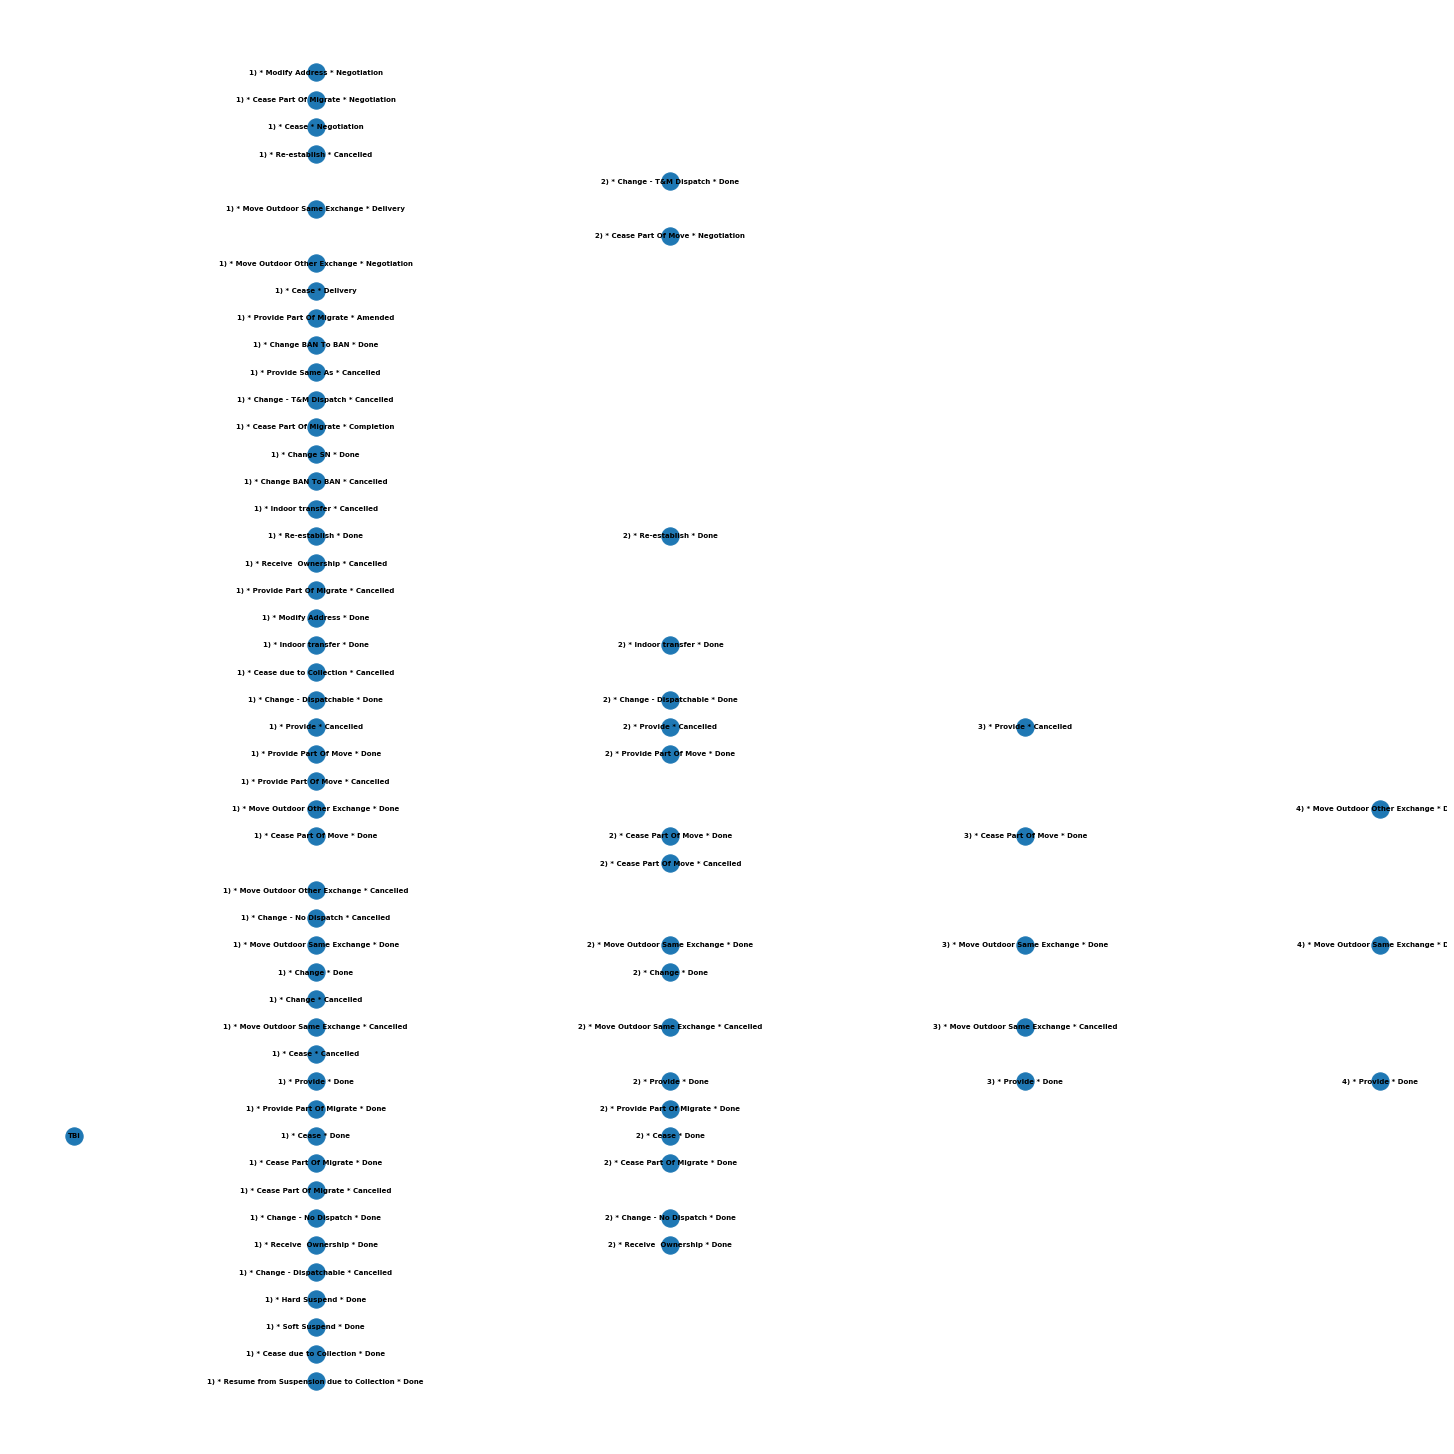

In [44]:
# Draw the resulting graph
pos = nx.get_node_attributes(J,'posi')
nx.draw(J, pos ,with_labels=True, font_weight='bold', font_size = 7)
plt.show()

In [45]:
# clear edges
J.remove_edges_from(list(J.edges()))

In [46]:
#create edges with data (count, days, ave_days)
# accumulated time for nodes

date_col = orders_df.columns.get_loc('ORDER_CREATION_DATE')
kpi = 5

for c in customers:

    temp_df = orders_df[orders_df[unique_col] == c]
  
    for i in range(len(temp_df)-1):
        #print(i, c)
        if J.has_edge(temp_df.iloc[i, -1], temp_df.iloc[(i+1),-1]) == False:
            #print(temp_df.iloc[i, -1], temp_df.iloc[(i+1),-1])
            #print(temp_df.iloc[i,-4], temp_df.iloc[(i+1),-4])
            J.add_edge(temp_df.iloc[i, -1], temp_df.iloc[(i+1),-1])
            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count'] = 1
            difference = (temp_df.iloc[(i+1),date_col]-temp_df.iloc[i, date_col])
            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['days'] = round(difference.total_seconds()/(60*60*24),1)
            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['ave_days'] = round(J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['days']/ J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count'],1)
            
            acc_current = J.node[temp_df.iloc[(i+1),-1]]['acc_time']
            J.node[temp_df.iloc[(i+1),-1]]['acc_time'] = round(acc_current + temp_df.iloc[(i+1),-3].total_seconds()/(60*60*24),1) #-3 is total_time
            #J.node[temp_df.iloc[(i+1),-1]]['node_count'] += 1
            
            
            if J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['ave_days'] > kpi:
                J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['color'] = 'red'
            else:
                J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['color'] = 'green'

        else:
            current_count = J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count']
            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count'] = current_count + 1

            current_days =  J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['days']
            difference = (temp_df.iloc[(i+1),date_col]-temp_df.iloc[i, date_col])
            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['days'] = round(current_days + difference.total_seconds()/(60*60*24),1)

            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['ave_days'] = round(J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['days']/ J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count'],1)
            
            acc_current = J.node[temp_df.iloc[(i+1),-1]]['acc_time']
            J.node[temp_df.iloc[(i+1),-1]]['acc_time'] = round(acc_current + temp_df.iloc[(i+1),-3].total_seconds()/(60*60*24),1) #-3 is total_time         
            #J.node[temp_df.iloc[(i+1),-1]]['node_count'] += 1
            
            if J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['ave_days'] > kpi:
                J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['color'] = 'red'
            else:
                J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['color'] = 'green'


In [47]:
for j in J.nodes:
    #print(j)
    #print(J.node[j]['acc_time'])
    #print(J.node[j]['node_count'])
    calc_J = round(J.node[j]['acc_time']/J.node[j]['node_count'],1)
    #print(J.node[j]['ave_journey'])

In [48]:
# add edge weight attribute

all_counts = []

#Iterate through the graph edges to gather all the weights
for (node1,node2,data) in J.edges(data=True):
    all_counts.append(data['count']) 

    
total_count = sum(all_counts)
max_count = max(all_counts)
min_count = min(all_counts)
ave_count = total_count/len(all_counts)
scale = 14

print('Total Counts',total_count)
print('Max Count',max_count)
print('Min Count', min_count)
print('Ave Count',ave_count)


if (max_count-min_count) == 0:
    for (node1,node2,data) in J.edges(data=True):
        J.edges[node1,node2]['weight'] = round(J.edges[node1,node2]['count'],1)

else:                                                
    for (node1,node2,data) in J.edges(data=True):
        J.edges[node1,node2]['weight'] = round(((J.edges[node1,node2]['count']-min_count)/(max_count-min_count))*scale+1,1)
    

Total Counts 166
Max Count 102
Min Count 1
Ave Count 5.928571428571429


In [49]:
J.edges(data=True)

EdgeDataView([('1) * Cease Part Of Migrate * Done', '2) * Provide Part Of Migrate * Done', {'color': 'green', 'ave_days': 0.0, 'weight': 1.1, 'count': 2, 'days': 0.0}), ('2) * Move Outdoor Same Exchange * Cancelled', '1) * Move Outdoor Same Exchange * Cancelled', {'color': 'red', 'ave_days': 10.5, 'weight': 1.1, 'count': 2, 'days': 21.0}), ('2) * Move Outdoor Same Exchange * Cancelled', '3) * Move Outdoor Same Exchange * Cancelled', {'color': 'green', 'ave_days': 4.9, 'weight': 1.0, 'count': 1, 'days': 4.9}), ('2) * Move Outdoor Same Exchange * Cancelled', '3) * Move Outdoor Same Exchange * Done', {'color': 'red', 'ave_days': 239.0, 'weight': 1.0, 'count': 1, 'days': 239.0}), ('1) * Provide Part Of Migrate * Cancelled', '2) * Provide Part Of Migrate * Done', {'color': 'green', 'ave_days': 1.7, 'weight': 1.8, 'count': 7, 'days': 12.1}), ('2) * Move Outdoor Same Exchange * Done', '1) * Move Outdoor Same Exchange * Cancelled', {'color': 'red', 'ave_days': 30.0, 'weight': 1.3, 'count': 3, 

In [50]:
J.nodes(data = True)

NodeDataView({'1) * Cease Part Of Migrate * Done': {'acc_time': 0, 'node_count': 526, 'posi': (1.25, 9)}, '2) * Move Outdoor Same Exchange * Cancelled': {'acc_time': 21.0, 'node_count': 2, 'posi': (2.5, 14)}, '1) * Provide Part Of Migrate * Cancelled': {'acc_time': 0, 'node_count': 14, 'posi': (1.25, 30)}, '4) * Move Outdoor Same Exchange * Done': {'acc_time': 53.0, 'node_count': 1, 'posi': (5.0, 17)}, '1) * Change - Dispatchable * Done': {'acc_time': 0, 'node_count': 2, 'posi': (1.25, 26)}, '1) * Cease * Delivery': {'acc_time': 0, 'node_count': 4, 'posi': (1.25, 41)}, '1) * Soft Suspend * Done': {'acc_time': 0, 'node_count': 2000, 'posi': (1.25, 3)}, '1) * Change - No Dispatch * Done': {'acc_time': 0, 'node_count': 143, 'posi': (1.25, 7)}, '1) * Change - No Dispatch * Cancelled': {'acc_time': 0, 'node_count': 15, 'posi': (1.25, 18)}, '1) * Change SN * Done': {'acc_time': 0, 'node_count': 4, 'posi': (1.25, 35)}, '1) * Provide * Done': {'acc_time': 0, 'node_count': 51, 'posi': (1.25, 12

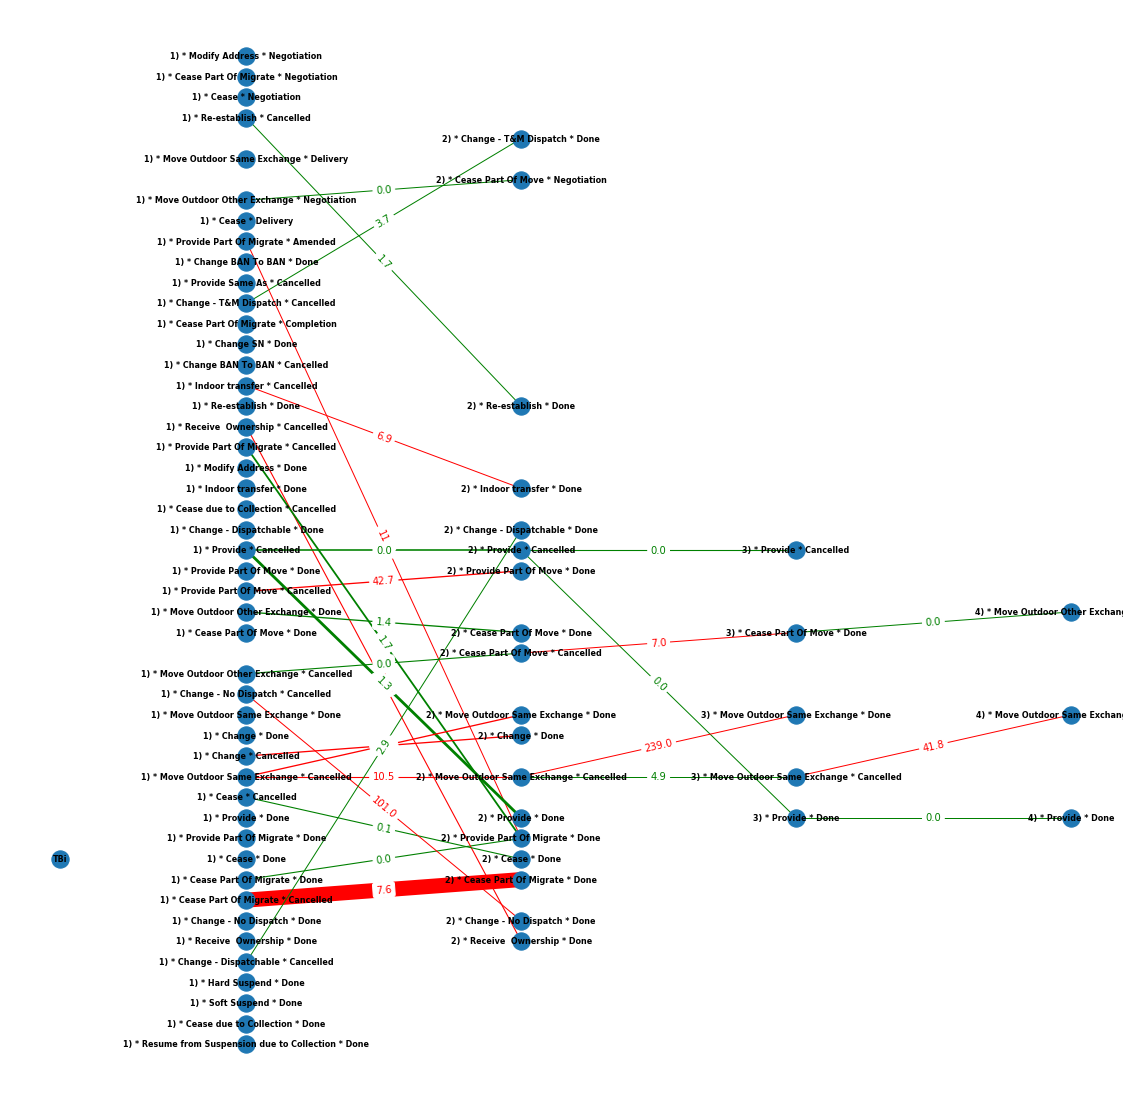

In [51]:
# Draw the resulting graph

#mpl_fig = plt.figure()
mpl_fig, ax = plt.subplots(1,1)

#pos = nx.circular_layout(J)
pos = nx.get_node_attributes(J,'posi')
edges,colors = zip(*nx.get_edge_attributes(J,'color').items())
edges,width = zip(*nx.get_edge_attributes(J,'weight').items())


nx.draw(J,pos, ax=ax, with_labels=True, font_weight='bold', font_size = 8, edgelist=edges, edge_color=colors, width = width
       )

edge_labels  = nx.get_edge_attributes(J,'ave_days')
#label_color  = nx.get_edge_attributes(J,'color').values()

#print(pos)

for e in J.edges(data=True):
    #print(e)
    #print(e[0])
    #print(e[1])
    #print(e[2])
    #print(e[2]['color'])
    nx.draw_networkx_edge_labels(J,ax=ax, pos=pos,edge_labels={(e[0],e[1]):e[2]['ave_days']}, font_color = e[2]['color'])

    
    
    
plt.savefig('stage_transition_edge_colour')
plt.show()

In [52]:
type(mpl_fig)

matplotlib.figure.Figure

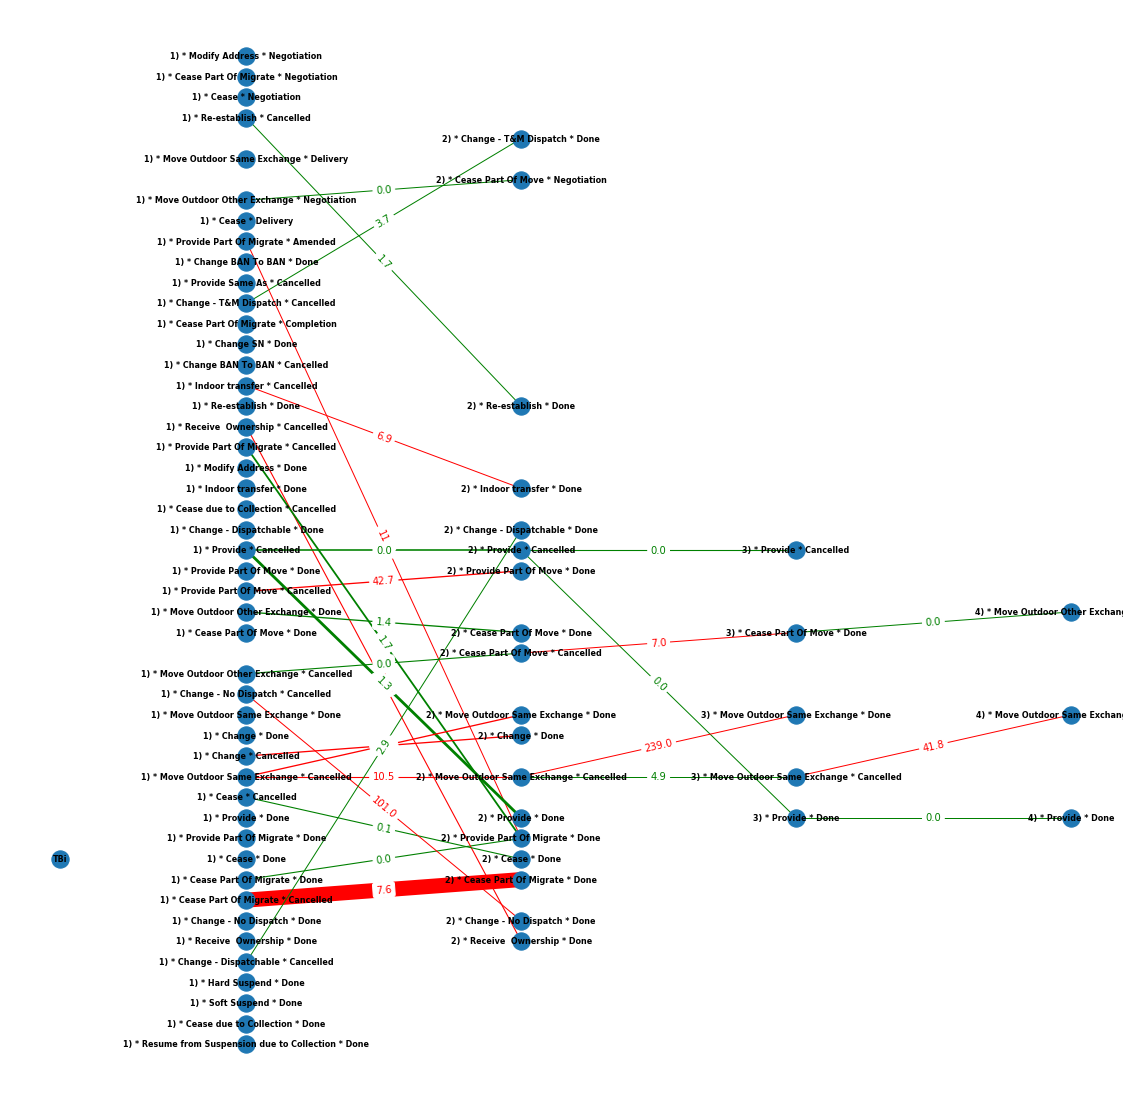

In [53]:
mpl_fig

In [54]:
#pip install dash==1.4.1

In [55]:
#pip install chart_studio

In [56]:
import chart_studio.plotly as py
from plotly.tools import mpl_to_plotly
import dash_core_components as dcc


In [57]:
import ipywidgets

In [58]:
plotly_fig = mpl_to_plotly(mpl_fig)

/usr/local/lib/python3.5/dist-packages/plotly/matplotlylib/renderer.py:474: UserWarning:

Dang! That path collection is out of this world. I totally don't know what to do with it yet! Plotly can only import path collections linked to 'data' coordinates



In [59]:
plotly_fig

In [60]:
graph = dcc.Graph(id='myGraph', figure=plotly_fig)  # figure not fig 

In [61]:
graph

Graph(id='myGraph', figure=Figure({
    'data': [{'marker': {'color': 'rgba(31,120,180,1.0)',
                         'line': {'color': 'rgba(31,120,180,1.0)', 'width': 1.0},
                         'size': 17.320508075688775,
                         'symbol': 'circle'},
              'mode': 'markers',
              'type': 'scatter',
              'x': [1.25, 2.5, 1.25, 2.5, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
                    1.25, 1.25, 2.5, 3.75, 2.5, 1.25, 2.5, 5.0, 1.25, 1.25, 1.25,
                    2.5, 1.25, 1.25, 2.5, 1.25, 2.5, 2.5, 1.25, 1.25, 1.25, 1.25,
                    2.5, 5.0, 1.25, 2.5, 1.25, 2.5, 1.25, 2.5, 1.25, 2.5, 1.25,
                    3.75, 1.25, 1.25, 1.25, 1.25, 2.5, 1.25, 1.25, 1.25, 1.25,
                    1.25, 0.4, 3.75, 1.25, 1.25, 1.25, 2.5, 5.0, 3.75, 3.75, 1.25,
                    2.5, 1.25, 2.5, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25],
              'xaxis': 'x',
              'y': [9.0, 14.0, 30.0, 17.0, 26.0, 41.0, 3.0, 15.0, 7.0, 18.

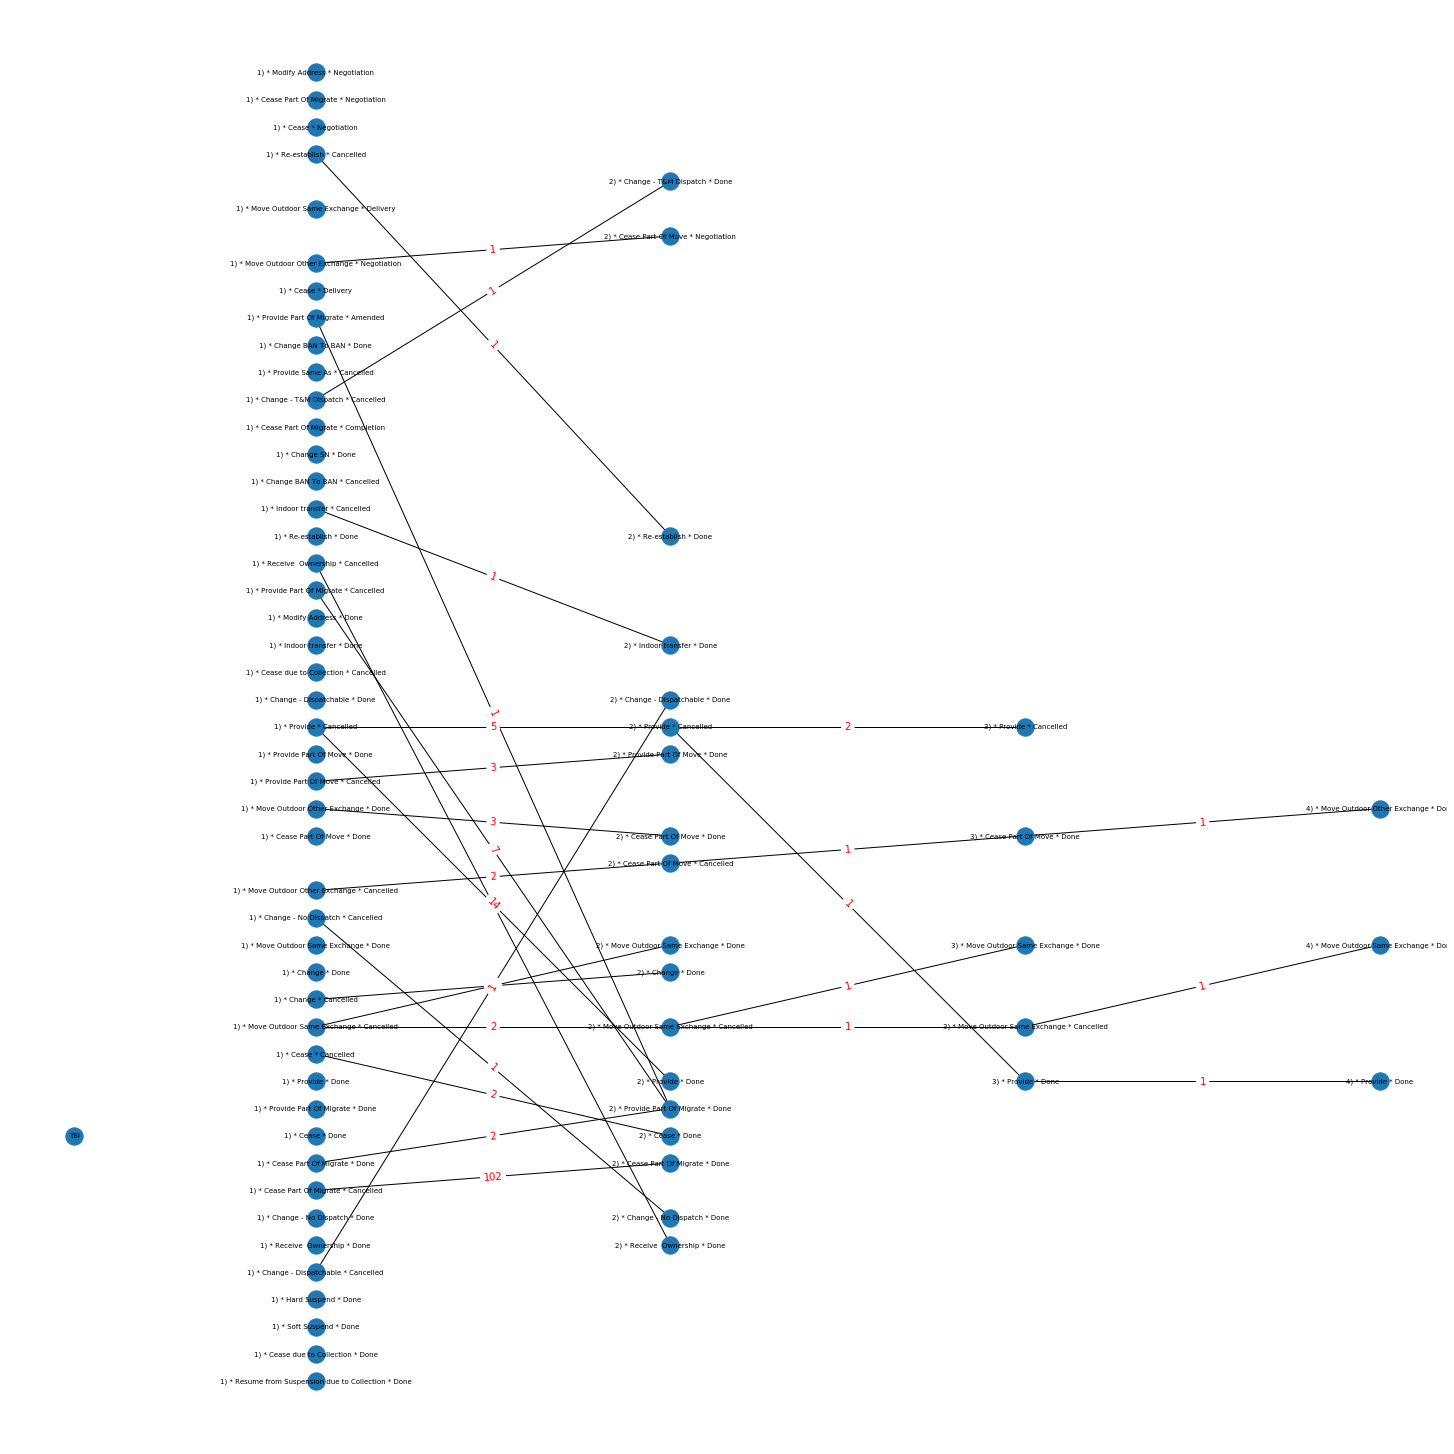

In [62]:
# Draw the resulting graph
#pos = nx.circular_layout(J)
pos = nx.get_node_attributes(J,'posi')
nx.draw(J,pos, with_labels=True, font_size = 7
        #, arrowstyle='->',arrowsize=15
       )

edge_labels = nx.get_edge_attributes(J, 'count')
nx.draw_networkx_edge_labels(J,pos,edge_labels=edge_labels,font_color='red')

plt.show()

In [63]:
orders_df[orders_df['stage_ActionType_OrderStatus']=='2) * Cease Part Of Move * Cancelled']['MSISDN_ANON'].unique()

array(['3842282672409691663', '3665642364268550244'], dtype=object)

In [64]:
#orders_df[orders_df['MSISDN_ANON']=='91450653458314736']